In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8')


In [6]:
df = pd.read_csv("Uber-Jan-Feb-FOIL.csv")
df.head()


,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421
3,B02682,1/1/2015,945,7679
4,B02617,1/1/2015,1228,9537


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   dispatching_base_number  354 non-null    object
 1   date                     354 non-null    object
 2   active_vehicles          354 non-null    int64 
 3   trips                    354 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 11.2+ KB


In [8]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.head()


,dispatching_base_number,active_vehicles,trips
date,,,
2015-01-01,B02512,190,1132
2015-01-01,B02765,225,1765
2015-01-01,B02764,3427,29421
2015-01-01,B02682,945,7679
2015-01-01,B02617,1228,9537


In [9]:
df.isnull().sum()


dispatching_base_number    0
active_vehicles            0
trips                      0
dtype: int64

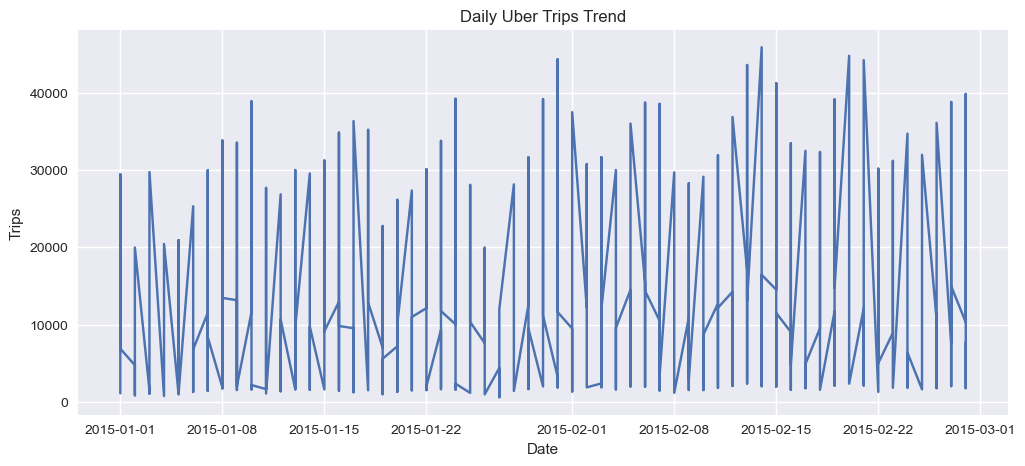

In [10]:
plt.figure(figsize=(12,5))
plt.plot(df['trips'])
plt.title("Daily Uber Trips Trend")
plt.xlabel("Date")
plt.ylabel("Trips")
plt.show()


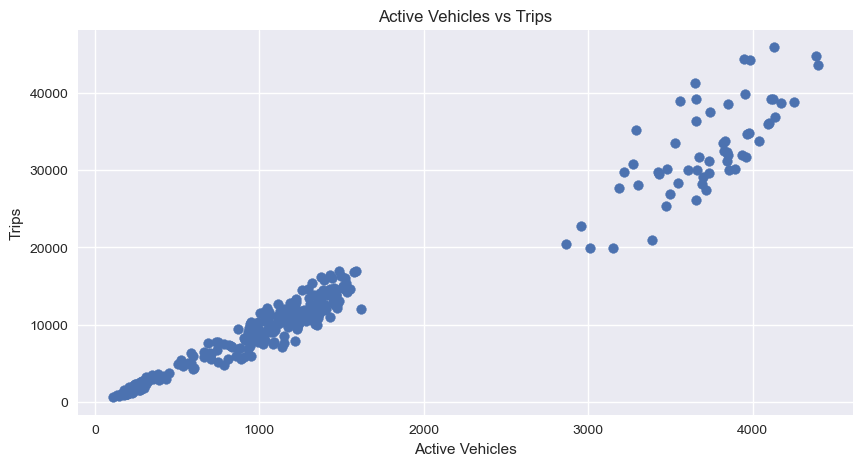

In [13]:
plt.figure(figsize=(10,5))
plt.scatter(df['active_vehicles'], df['trips'])
plt.xlabel("Active Vehicles")
plt.ylabel("Trips")
plt.title("Active Vehicles vs Trips")
plt.show()


In [14]:
def create_lag_features(data, lags=7):
    df_new = data.copy()
    for i in range(1, lags+1):
        df_new[f'lag_{i}'] = df_new['trips'].shift(i)
    return df_new

df_lag = create_lag_features(df)
df_lag.dropna(inplace=True)
df_lag.head()


,dispatching_base_number,active_vehicles,trips,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
date,,,,,,,,,,
2015-01-02,B02617,1137,7065,4768.0,6903.0,9537.0,7679.0,29421.0,1765.0,1132.0
2015-01-02,B02512,175,875,7065.0,4768.0,6903.0,9537.0,7679.0,29421.0,1765.0
2015-01-02,B02682,890,5506,875.0,7065.0,4768.0,6903.0,9537.0,7679.0,29421.0
2015-01-02,B02765,196,1001,5506.0,875.0,7065.0,4768.0,6903.0,9537.0,7679.0
2015-01-02,B02764,3147,19974,1001.0,5506.0,875.0,7065.0,4768.0,6903.0,9537.0


In [15]:
X = df_lag.drop('trips', axis=1)
y = df_lag['trips']


In [16]:
split = int(len(df_lag) * 0.8)

X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [17]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)


ValueError: could not convert string to float: 'B02617'

In [18]:
df.columns


Index(['dispatching_base_number', 'active_vehicles', 'trips'], dtype='object')

In [19]:
X = df[['active_vehicles']]
y = df['trips']


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [21]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)


In [22]:
from sklearn.metrics import r2_score, mean_absolute_error

print("R2 Score:", r2_score(y_test, rf_pred))
print("MAE:", mean_absolute_error(y_test, rf_pred))


R2 Score: 0.948237601011574
MAE: 1531.9164942991283


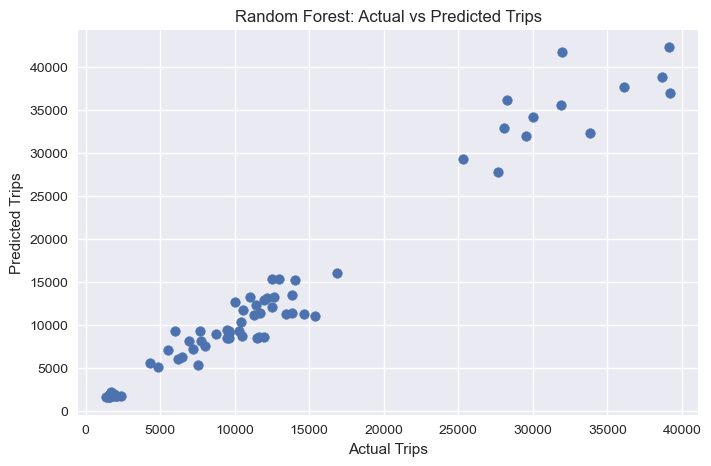

In [23]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, rf_pred)
plt.xlabel("Actual Trips")
plt.ylabel("Predicted Trips")
plt.title("Random Forest: Actual vs Predicted Trips")
plt.show()


In [24]:
!pip install xgboost


In [25]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=5
)

xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)


In [26]:
from sklearn.metrics import mean_absolute_percentage_error

print("Random Forest MAPE:", mean_absolute_percentage_error(y_test, rf_pred))
print("XGBoost MAPE:", mean_absolute_percentage_error(y_test, xgb_pred))


Random Forest MAPE: 0.13359194227936494
XGBoost MAPE: 0.1307310312986374


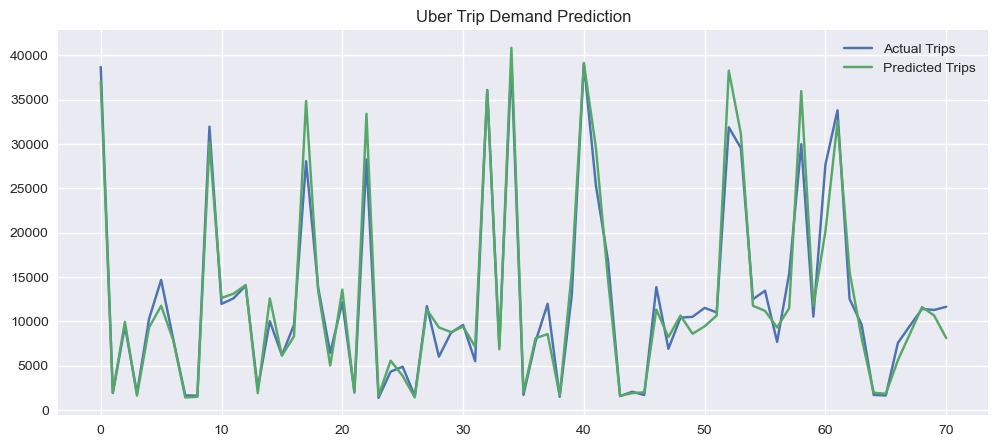

In [27]:
plt.figure(figsize=(12,5))
plt.plot(y_test.values, label="Actual Trips")
plt.plot(xgb_pred, label="Predicted Trips")
plt.legend()
plt.title("Uber Trip Demand Prediction")
plt.show()


In [28]:
pip install streamlit


Note: you may need to restart the kernel to use updated packages.
